In [18]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import sys
import argparse
import re
from scipy.stats import skew as sps

In [7]:
path_list = 'C:/Users/emily/documents/CO2_calibration/Summer_1','C:/Users/emily/documents/CO2_calibration/Summer_2','C:/Users/emily/documents/CO2_calibration/Summer_3','C:/Users/emily/documents/CO2_calibration/Summer_4','C:/Users/emily/documents/CO2_calibration/Summer_5','C:/Users/emily/documents/CO2_calibration/Summer_6','C:/Users/emily/documents/CO2_calibration/Summer_7','C:/Users/emily/documents/CO2_calibration/Summer_8'

In [8]:
a = []
b = []
berr = []
all2CO2 = []

for path in path_list:
    for filename in os.listdir(path):
        print(filename)
        with open(path+'/'+filename,'r') as f:
            reader = csv.reader(f)
            CO2 = []
            err = []

            for row in reader:
                try:
                    start = float(row[0])+7200
                    break
                except Exception as e:
                    pass

            ends = start+14400

            for row in reader:
                if float(row[0]) >= start:
                    if float(row[0]) <= ends:
                        try:
                            CO2.append(float(row[1]))
                            err.append(float(row[2]))
                        except Exception as e:
                            print(e)
                            pass  

            CO2_avg = np.mean(np.array(CO2))
            err_avg = np.std(np.array(CO2))
            print(CO2_avg)
            print(err_avg)
            file_ID = re.match( r'(.*)_(.*)_g8_2019.*', filename, re.M)
            if file_ID:
                a.append(file_ID.group(2))
                b.append(CO2_avg)
                berr.append(err_avg)
                all2CO2.append(CO2)

Inside_p1_g1_2019-05-28_CO2.csv
553.0630531478198
5.679723881708976
Inside_p1_g3_2019-05-28_CO2.csv
431.945199417906
0.4154961388721495
Inside_p1_g4_2019-05-28_CO2.csv
428.2896269249659
2.529218012037203
Inside_p1_g5_2019-05-28_CO2.csv
414.38964125750954
0.5978561273595472
Inside_p1_g6_2019-05-28_CO2.csv
436.38213037474054
0.37695641378559963
Inside_p1_g7_2019-05-28_CO2.csv
537.4856838656896
2.3362662826604375
Inside_p1_g8_2019-05-28_CO2.csv
439.62898485617177
0.48982789101925
Inside_p2_g1_2019-05-30_CO2.csv
457.4483914301453
5.710822328155824
Inside_p2_g3_2019-05-30_CO2.csv
432.81740041840317
0.41343007717894853
Inside_p2_g4_2019-05-30_CO2.csv
439.3214470412807
5.293945306160945
Inside_p2_g5_2019-05-30_CO2.csv
414.91399762376113
0.24093855297843986
Inside_p2_g6_2019-05-30_CO2.csv
443.70906514833723
4.4496672830995
Inside_p2_g7_2019-05-30_CO2.csv
449.29748207234036
4.261343314303451
Inside_p2_g8_2019-05-30_CO2.csv
442.61170539399075
1.3936767162982457
Inside_p3_g1_2019-05-31_CO2.csv
45

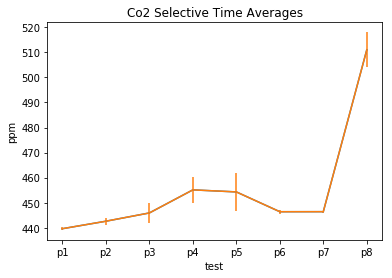

In [9]:
plt.plot(a,b)
plt.errorbar(a,b,berr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Selective Time Averages')

plt.show()

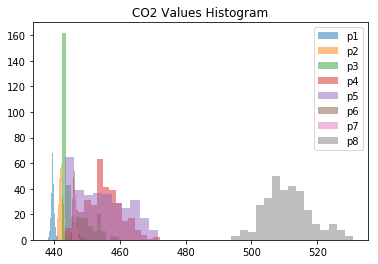

In [10]:
labels=a
for i in range(len(all2CO2)):
    n, bins, patches = plt.hist(x=all2CO2[i], bins='auto', alpha=0.5, label=labels[i])
    plt.legend(loc='best')
    plt.title('CO2 Values Histogram')

In [11]:
Total_mean = np.mean(np.array(b))
Tmean = print('Total avg = {}'.format(Total_mean))
Total_std = np.std(np.array(b))
print('Total std = {}'.format(Total_std))
Ins_rms = np.square(np.array(berr))
Total_rms = np.sqrt(np.sum(Ins_rms))
print('rms = {}'.format(Total_rms))

Total avg = 455.1805018697798
Total std = 21.67852171992724
rms = 12.379216170409101


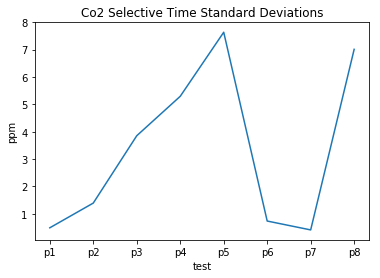

In [12]:
plt.plot(a,berr)

plt.xlabel('test')
plt.ylabel('ppm')

plt.title('Co2 Selective Time Standard Deviations')

plt.show()

In [20]:
sps(np.array(b))

2.040822983069226